In [1]:
### ValDXer testing
import os
os.environ['HDXER_PATH'] = '/home/alexi/Documents/HDXer'


In [2]:

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.DCD import DCDWriter  # Import DCDWriter directly


settings = Settings(name='test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange')
settings.replicates = 1
settings.gamma_range = (1,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.stride = 100000 
settings.HDXer_stride = 1
settings.RW_do_reweighting = False
settings.RW_do_params = True
import pickle

expt_name = 'Experimental'
test_name = "MD_Simulated"


/home/alexi/Documents/ValDX


In [3]:
import os
print(os.getenv('HDXER_PATH'))


/home/alexi/Documents/HDXer


In [4]:
print(os.environ["HDXER_PATH"])
print(__name__)

/home/alexi/Documents/HDXer
__main__


In [5]:
# BPTI data

def preprocess_main_MD():
    pdb_path = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein.pdb"

    with open(pdb_path, 'r') as f:
        pdb = f.readlines()
        newlines = []
        for line in pdb:
            if line.startswith('ATOM'):
                # replace index 26 with " "
                line = line[:26] + " " + line[27:]

            newlines.append(line)

    with open('bpti-protein.pdb', 'w') as f:
        f.writelines(newlines)

    BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

    os.listdir(expt_dir)

    segs_name = "BPTI_residue_segs.txt"
    segs_path = os.path.join(expt_dir, segs_name)

    hdx_name = "BPTI_expt_dfracs.dat"
    hdx_path = os.path.join(expt_dir, hdx_name)
    print(hdx_path)

    rates_name = "BPTI_Intrinsic_rates.dat"
    rates_path = os.path.join(expt_dir, rates_name)

    SHAW_dir = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein"

    dir_list = os.listdir(SHAW_dir)

    dcd_list = [i for i in dir_list if i.endswith(".dcd")]
    # remove any with small in name
    dcd_list = [i for i in dcd_list if not "_str" in i]

    dcd_list.sort()
    print(dcd_list)
    print(len(dcd_list))

    sim_name = "BPTI_SHAW"
    top_name = "bpti-protein_noalt.pdb"
    top_path = os.path.join(SHAW_dir, top_name)
    reps = len(dcd_list)
    # reps =100

    traj_paths = [os.path.join(SHAW_dir, i) for i in dcd_list[:reps]]
    print(top_path)
    print(traj_paths)




    small_traj_paths = []

    for rep in range(len(traj_paths)):
        traj = traj_paths[rep]
        u = mda.Universe(top_path, traj)
        print(u.trajectory.n_frames)

        # sample by stride settings.stide

        small_traj_name = traj.replace(".dcd", f"_str{settings.stride}.dcd")

        # Create an AtomGroup from the Universe's selection
        ag = u.select_atoms('all')

        # write traj
        with DCDWriter(small_traj_name, ag.n_atoms) as writer:
            for ts in u.trajectory[::settings.stride]:
                writer.write(ag)

        small_traj_paths.append(small_traj_name)

    return hdx_path, segs_path, rates_path, top_path, small_traj_paths, reps, sim_name, expt_name, test_name

In [6]:
def run_split_test(split_mode, name, system):

    # settings.split_mode = 'R'
    settings.split_mode = split_mode
    settings.name = "_".join([name, split_mode])

    VDX = ValDXer(settings)

    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=top_path, traj_paths=small_traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path

/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
['bpti-protein-000.dcd', 'bpti-protein-001.dcd', 'bpti-protein-002.dcd', 'bpti-protein-003.dcd', 'bpti-protein-004.dcd', 'bpti-protein-005.dcd', 'bpti-protein-006.dcd', 'bpti-protein-007.dcd', 'bpti-protein-008.dcd', 'bpti-protein-009.dcd', 'bpti-protein-010.dcd', 'bpti-protein-011.dcd', 'bpti-protein-012.dcd', 'bpti-protein-013.dcd', 'bpti-protein-014.dcd', 'bpti-protein-015.dcd', 'bpti-protein-016.dcd', 'bpti-protein-017.dcd', 'bpti-protein-018.dcd', 'bpti-protein-019.dcd', 'bpti-protein-020.dcd', 'bpti-protein-021.dcd', 'bpti-protein-022.dcd', 'bpti-protein-023.dcd', 'bpti-protein-024.dcd', 'bpti-protein-025.dcd', 'bpti-protein-026.dcd', 'bpti-protein-027.dcd', 'bpti-protein-028.dcd', 'bpti-protein-029.dcd', 'bpti-protein-030.dcd', 'bpti-protein-031.dcd', 'bpti-protein-032.dcd', 'bpti-protein-033.dcd', 'bpti-protein-034.dcd', 'bpti-protein-035.dcd', 'bpti-protein-036.dcd', 'bpti-protein-037.

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
1000

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008_str100000.dcd 

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis

Path /home/alexi/Documents/ValDX/data/random_r15/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/random_r15/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/random_r15/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/random_r15/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/random_r15/train_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/random_r15/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/random_r15/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10.   , 120.   ]), 'restart_interval': 1

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Recalculating val_MD_Simulated_1
    ResStr  ResEnd  peptide                                               path
0        5       6        1  /home/alexi/Documents/ValDX/data/random_r15/va...
1        6       7        2  /home/alexi/Documents/ValDX/data/random_r15/va...
2        9      10        3  /home/alexi/Documents/ValDX/data/random_r15/va...
3       13      14        5  /home/alexi/Documents/ValDX/data/random_r15/va...
4       16      17        7  /home/alexi/Documents/ValDX/data/random_r15/va...
5       19      20       10  /home/alexi/Documents/ValDX/data/random_r15/va...
6       20      21       11  /home/alexi/Documents/ValDX/data/random_r15/va...
7       23      24       14  /home/alexi/Documents/ValDX/data/random_r15/va...
8       28      29       18  /home/alexi/Documents/ValDX/data/random_r15/va...
9       30      31       20  /home/alexi/Documents/ValDX/data/random_r15/va...
10      31      32       21  /home/alexi/Documents/ValDX/data/random_r15/va...
11      32      33 

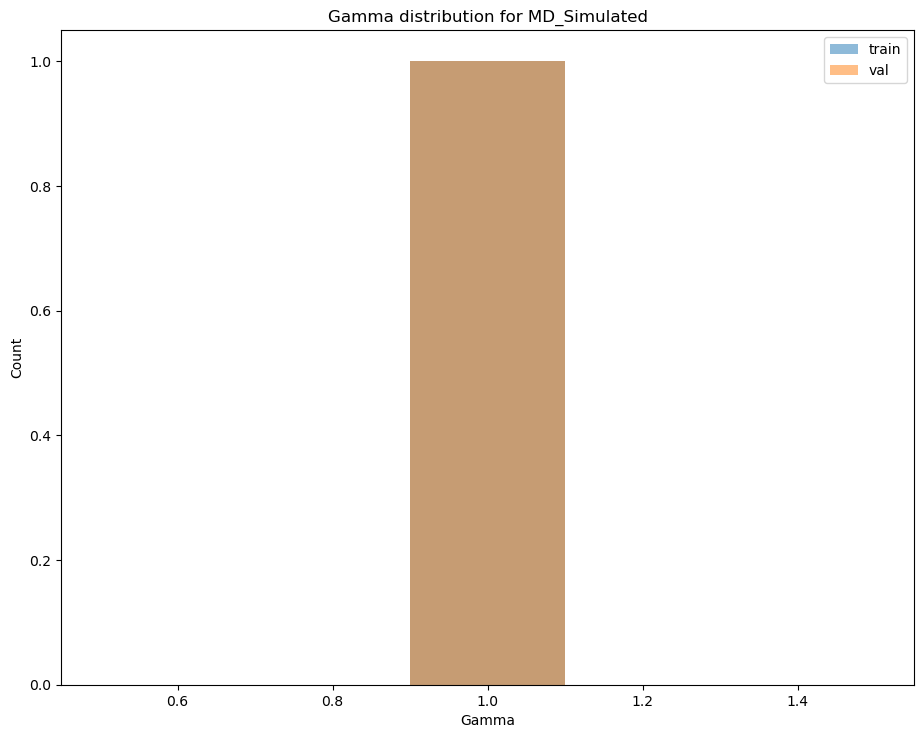

['train_MD_Simulated_1']
['val_MD_Simulated_1']
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000868  0.005184  0.050489  0.449883       36  test_MD_Simulated_1   
119  0.022105  0.119300  0.498431  0.787187       37  test_MD_Simulated_1   
120  0.050894  0.267842  0.950774  1.000000       38  test_MD_Simulated_1   
121  0.029918  0.155280  0.517709  0.768119       39  test_MD_Simulated_1   
122  0.001225  0.007313  0.070728  0.582919       40  test_MD_Simulated_1   

     Re

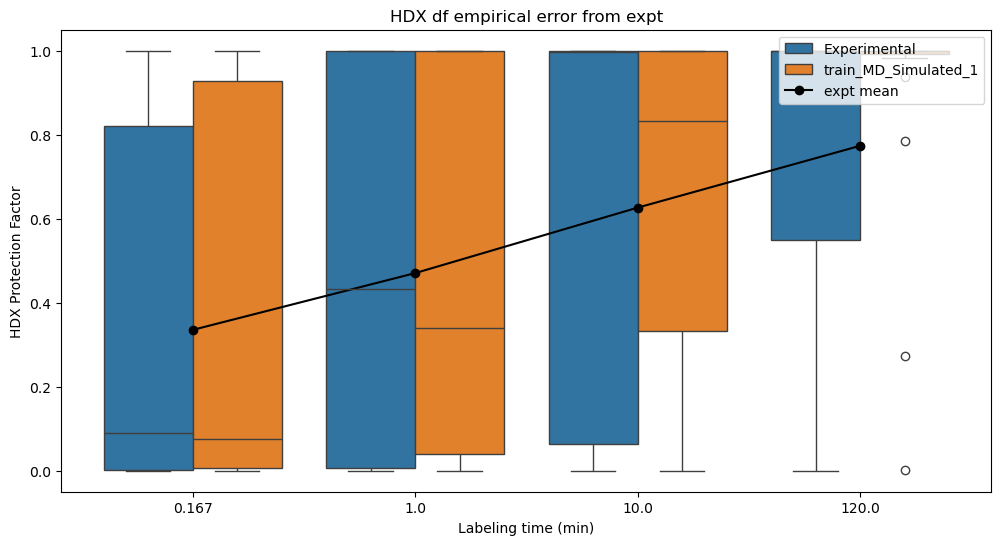

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000868  0.005184  0.050489  0.449883       36  test_MD_Simulated_1   
119  0.022105  0.119300  0.498431  0.787187       37  test_MD_Simulated_1   
120  0.050894  0.267842  0.950774  1.000000       38  test_MD_Simulated_1   
121  0.029918  0.155280  0.517709  0.768119       39  test_MD_Simulated_1   
122  0.001225  0.007313  0.070728  0.582919       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

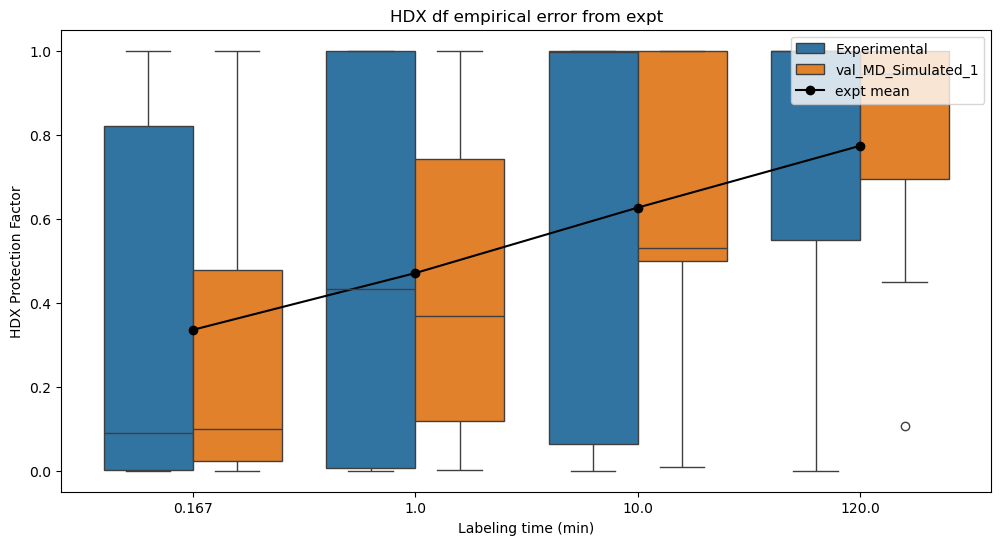

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000868  0.005184  0.050489  0.449883       36  test_MD_Simulated_1   
119  0.022105  0.119300  0.498431  0.787187       37  test_MD_Simulated_1   
120  0.050894  0.267842  0.950774  1.000000       38  test_MD_Simulated_1   
121  0.029918  0.155280  0.517709  0.768119       39  test_MD_Simulated_1   
122  0.001225  0.007313  0.070728  0.582919       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

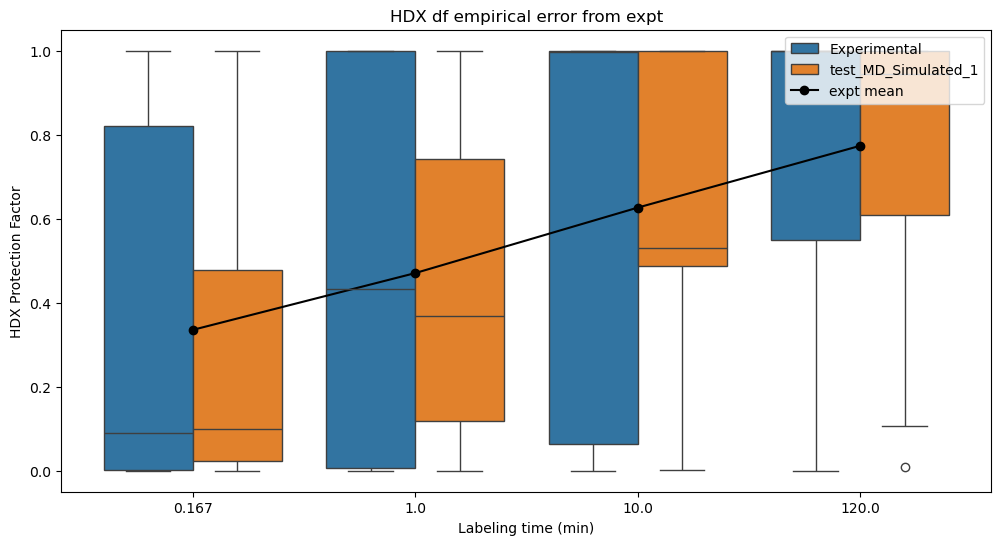

train_rep_names ['train_MD_Simulated_1']
val_rep_names ['val_MD_Simulated_1']
test_rep_names ['test_MD_Simulated_1']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0]
val_rep_peptides [1, 2, 3, 5, 7, 10, 11, 14, 18, 20, 21, 22, 23, 27, 28, 30, 31, 33, 36, 37, 38]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
manual merge df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.000440  0.002640  0.026130  0.272190       24  train_MD_Simulated_1   
1   0.017840  0.102170  0.659630  1.000000       13  train_MD_Simulated_1   
2   0.018100  0.103630  0.665130  1.000000        8  train_MD_Simulated_1   
3   0.007130  0.041960  0.348640  0.994170       25  train_MD_Simulated_1   
4   1.000000  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
..       ...       ...       ...       .

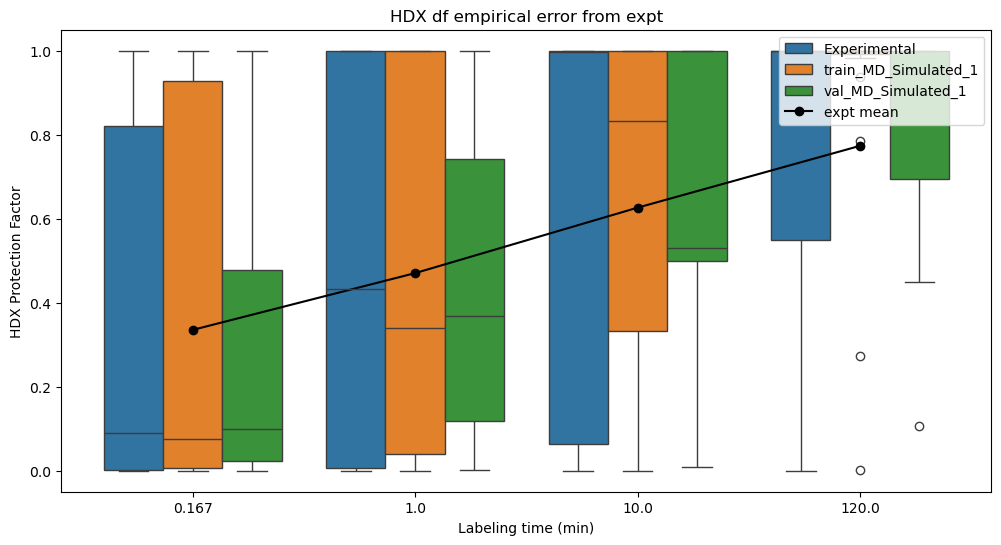

plotting paired errors
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000868  0.005184  0.050489  0.449883       36  test_MD_Simulated_1   
119  0.022105  0.119300  0.498431  0.787187       37  test_MD_Simulated_1   
120  0.050894  0.267842  0.950774  1.000000       38  test_MD_Simulated_1   
121  0.029918  0.155280  0.517709  0.768119       39  test_MD_Simulated_1   
122  0.001225  0.007313  0.070728  0.582919       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN 

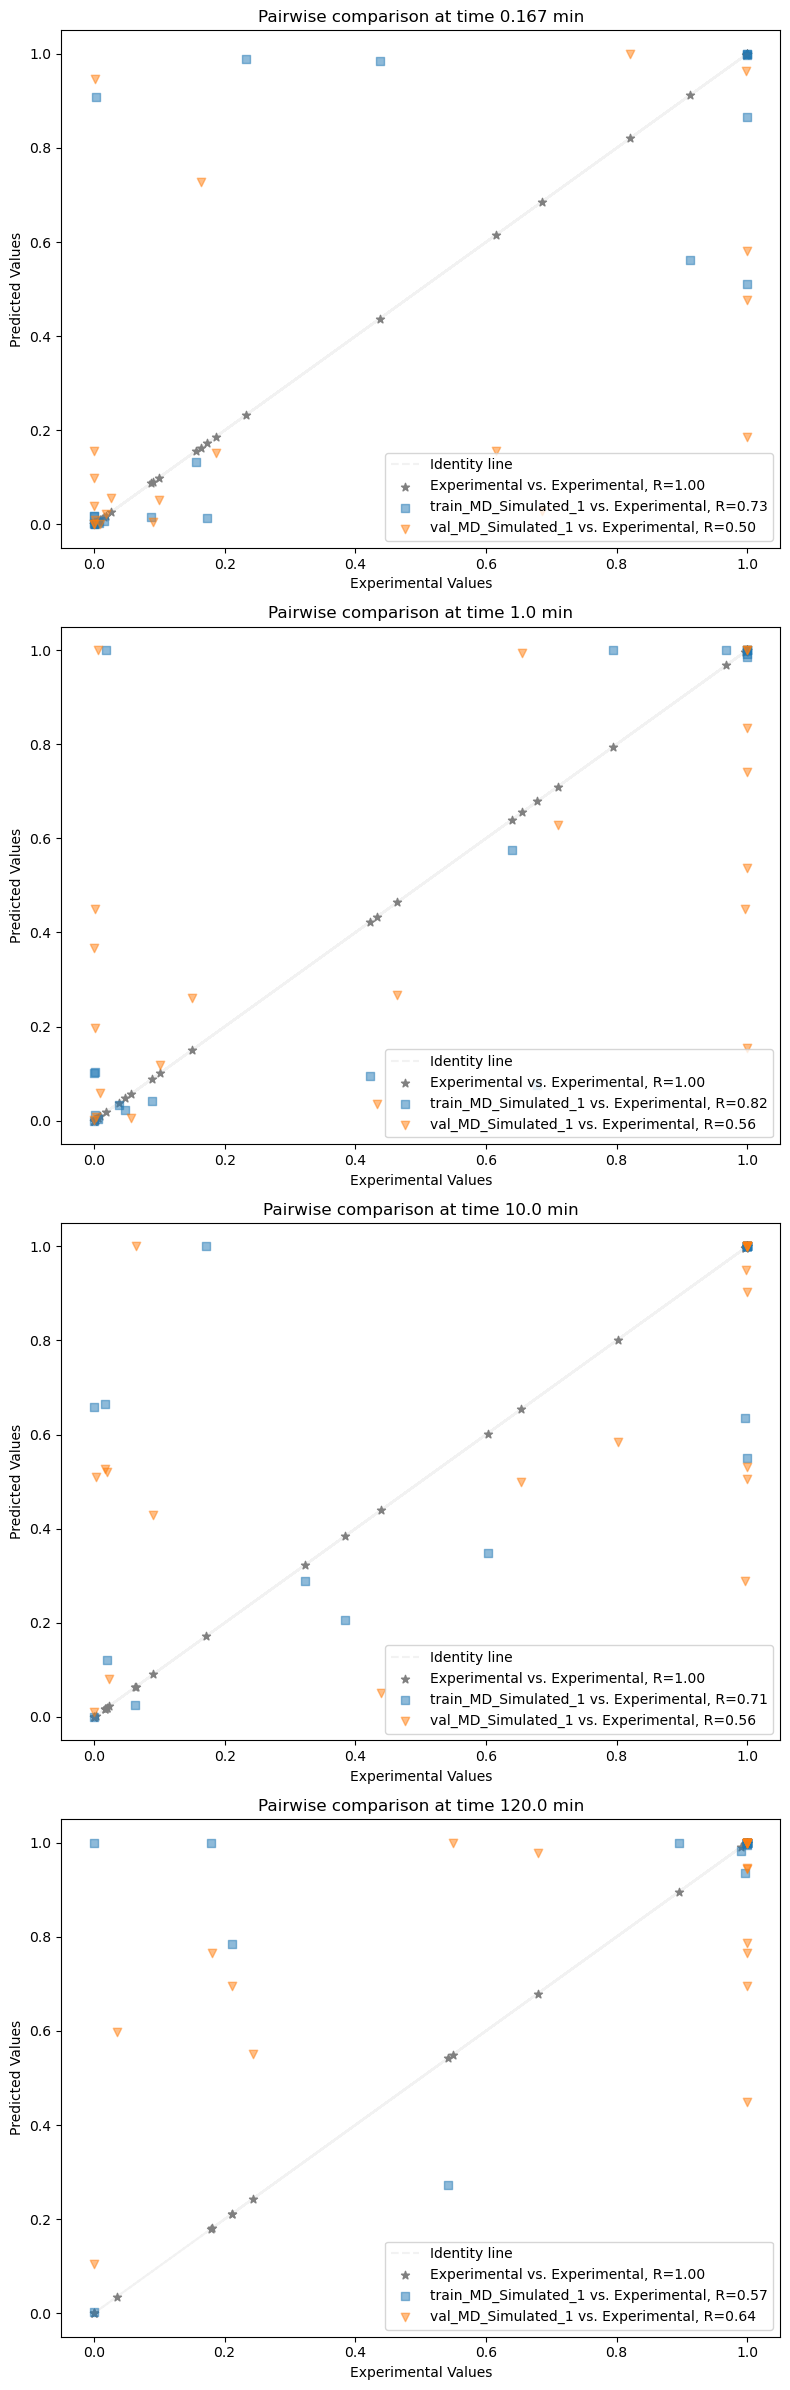

plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000868  0.005184  0.050489  0.449883       36  test_MD_Simulated_1   
119  0.022105  0.119300  0.498431  0.787187       37  test_MD_Simulated_1   
120  0.050894  0.267842  0.950774  1.000000       38  test_MD_Simulated_1   
121  0.029918  0.155280  0.517709  0.768119       39  test_MD_Simulated_1   
122  0.001225  0.007313  0.070728  0.582919       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN  

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train_R, str(key):train})], ignore_index=True)


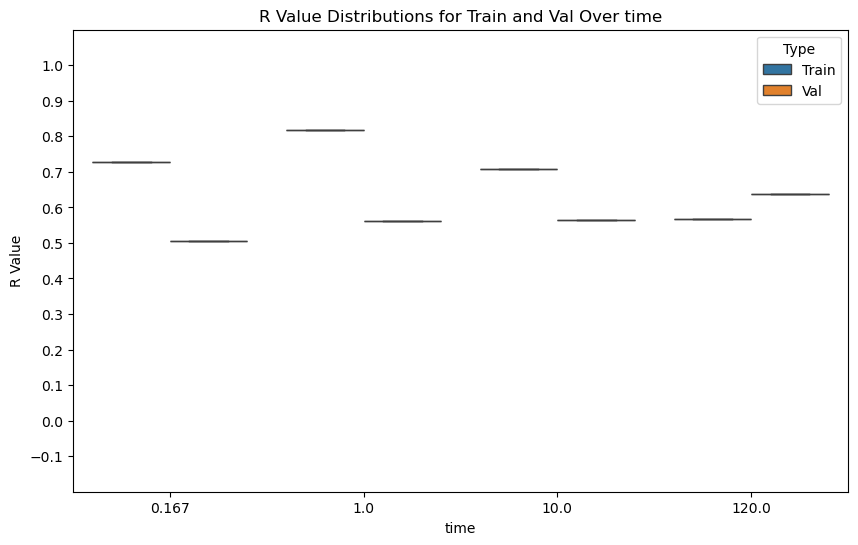

nan_df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.000440  0.002640  0.026130  0.272190       24  train_MD_Simulated_1   
1   0.017840  0.102170  0.659630  1.000000       13  train_MD_Simulated_1   
2   0.018100  0.103630  0.665130  1.000000        8  train_MD_Simulated_1   
3   0.007130  0.041960  0.348640  0.994170       25  train_MD_Simulated_1   
4   1.000000  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
..       ...       ...       ...       ...      ...                   ...   
77  0.947356  1.000000  1.000000  1.000000       31    val_MD_Simulated_1   
78  0.186052  0.536359  0.904021  1.000000       33    val_MD_Simulated_1   
79  0.000868  0.005184  0.050489  0.449883       36    val_MD_Simulated_1   
80  0.022105  0.119300  0.498431  0.787187       37    val_MD_Simulated_1   
81  0.050894  0.267842  0.950774  1.000000       38    val_MD_Simulated_1   

    ResStr  ResEnd                                               pat

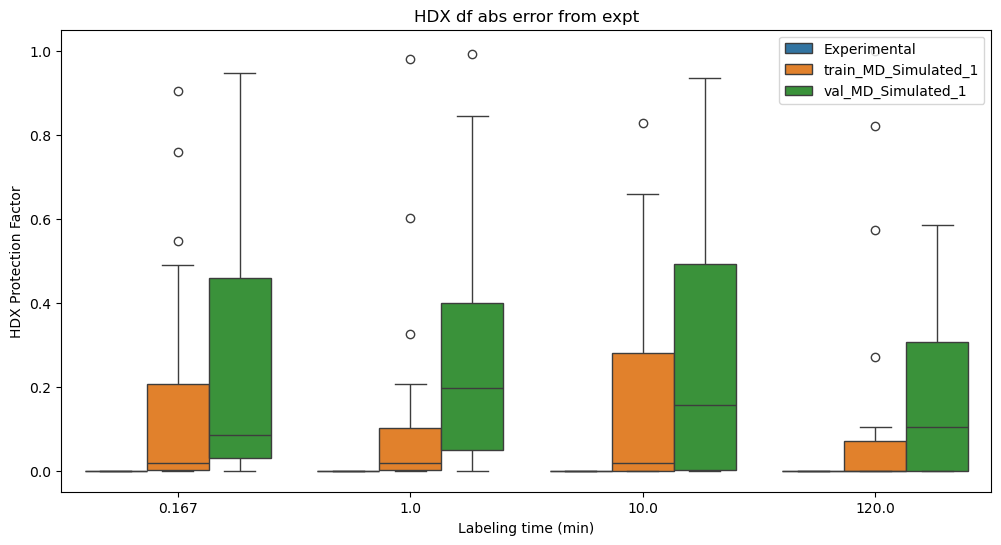

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.00044  0.00264  0.02613  0.27219       24  train_MD_Simulated_1   
1    0.01784  0.10217  0.65963  1.00000       13  train_MD_Simulated_1   
2    0.01810  0.10363  0.66513  1.00000        8  train_MD_Simulated_1   
3    0.00713  0.04196  0.34864  0.99417       25  train_MD_Simulated_1   
4    1.00000  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
118  0.00963  0.05627  0.43963  0.99904       36          Experimental   
119  0.01757  0.10068  0.65396  1.00000       37          Experimental   
120  0.09888  0.46390  0.99804  1.00000       38          Experimental   
121  0.00650  0.03831  0.32339  0.99079       39          Experimental   
122  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

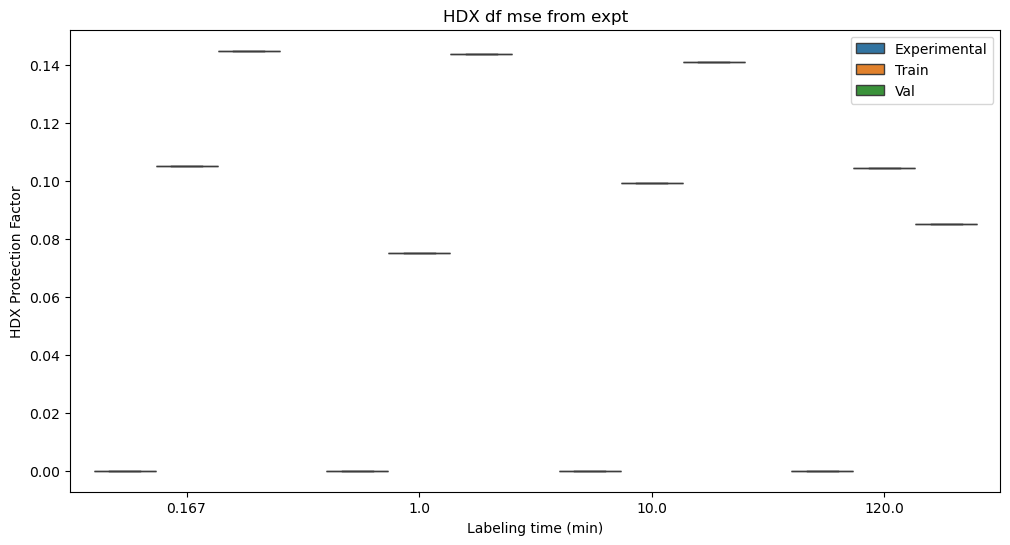

Saving experiment to:  logs/random_r15_1706635306.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:389: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name sequential_s already exists. Attempting to change name to sequential_s0
Experiment name sequential_s already exists. Attempting to change name to sequential_s1
Experiment name sequential_s already exists. Attempting to change name to sequential_s2
Preparing HDX data for Experimental
Path /home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
AVG: ncol = 6, len(names) = 4
                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   
2                                                NaN  MD_Simulated

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008_str100000.dcd 

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis

Path /home/alexi/Documents/ValDX/data/sequential_s2/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/sequential_s2/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/sequential_s2/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/sequential_s2/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/sequential_s2/train_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/sequential_s2/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/sequential_s2/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10.   , 120.   ]), 

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Recalculating val_MD_Simulated_1
    ResStr  ResEnd  peptide                                               path
0       31      32       21  /home/alexi/Documents/ValDX/data/sequential_s2...
1       32      33       22  /home/alexi/Documents/ValDX/data/sequential_s2...
2       33      34       23  /home/alexi/Documents/ValDX/data/sequential_s2...
3       34      35       24  /home/alexi/Documents/ValDX/data/sequential_s2...
4       35      36       25  /home/alexi/Documents/ValDX/data/sequential_s2...
5       36      37       26  /home/alexi/Documents/ValDX/data/sequential_s2...
6       37      38       27  /home/alexi/Documents/ValDX/data/sequential_s2...
7       40      41       28  /home/alexi/Documents/ValDX/data/sequential_s2...
8       41      42       29  /home/alexi/Documents/ValDX/data/sequential_s2...
9       42      43       30  /home/alexi/Documents/ValDX/data/sequential_s2...
10      43      44       31  /home/alexi/Documents/ValDX/data/sequential_s2...
11      44      45 

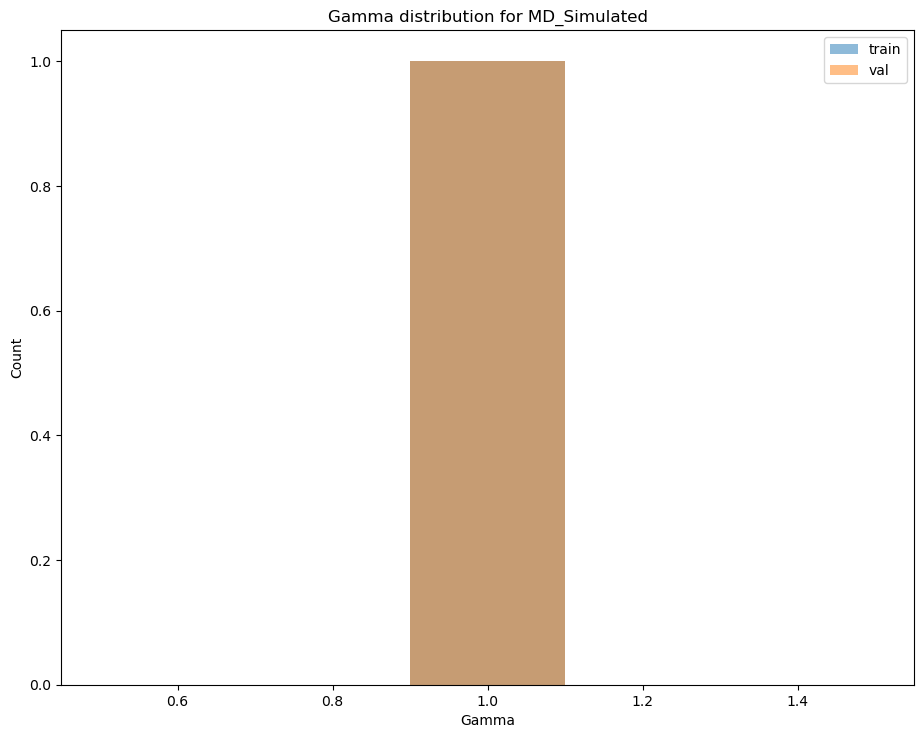

['train_MD_Simulated_1']
['val_MD_Simulated_1']
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000111  0.000663  0.006608  0.075666       36  test_MD_Simulated_1   
119  0.010440  0.059401  0.362303  0.558038       37  test_MD_Simulated_1   
120  0.025079  0.140829  0.773697  1.000000       38  test_MD_Simulated_1   
121  0.014793  0.082356  0.420637  0.547352       39  test_MD_Simulated_1   
122  0.000134  0.000802  0.007992  0.091791       40  test_MD_Simulated_1   

     Re

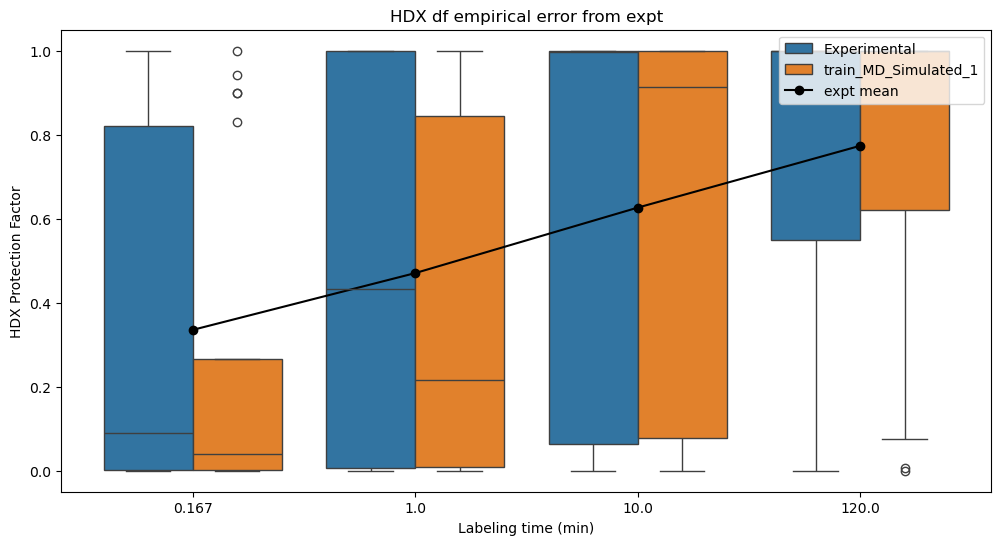

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000111  0.000663  0.006608  0.075666       36  test_MD_Simulated_1   
119  0.010440  0.059401  0.362303  0.558038       37  test_MD_Simulated_1   
120  0.025079  0.140829  0.773697  1.000000       38  test_MD_Simulated_1   
121  0.014793  0.082356  0.420637  0.547352       39  test_MD_Simulated_1   
122  0.000134  0.000802  0.007992  0.091791       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

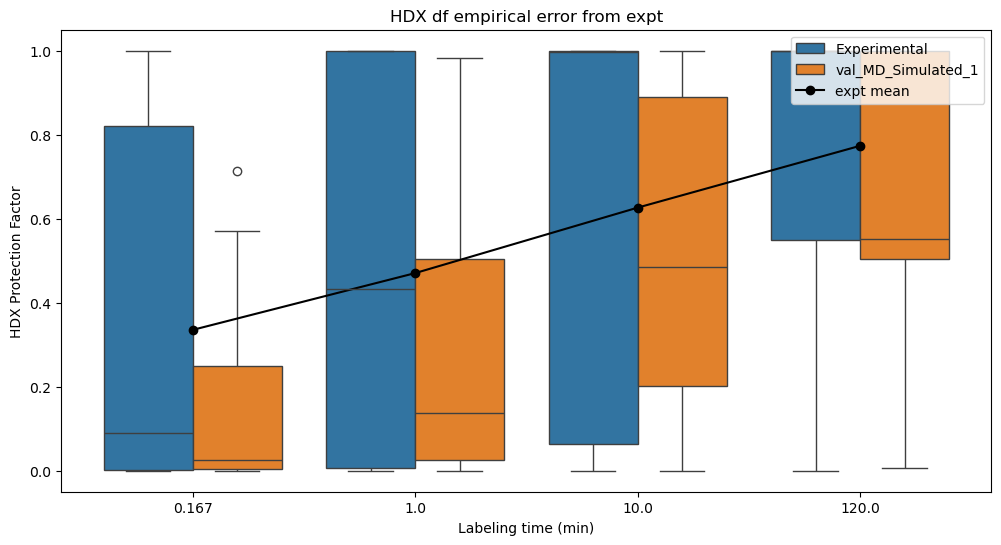

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000111  0.000663  0.006608  0.075666       36  test_MD_Simulated_1   
119  0.010440  0.059401  0.362303  0.558038       37  test_MD_Simulated_1   
120  0.025079  0.140829  0.773697  1.000000       38  test_MD_Simulated_1   
121  0.014793  0.082356  0.420637  0.547352       39  test_MD_Simulated_1   
122  0.000134  0.000802  0.007992  0.091791       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

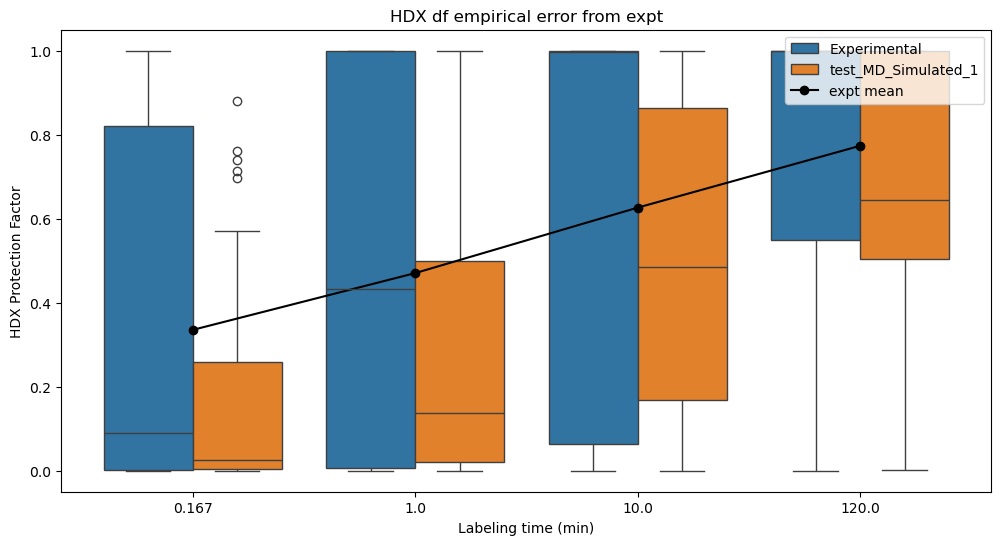

train_rep_names ['train_MD_Simulated_1']
val_rep_names ['val_MD_Simulated_1']
test_rep_names ['test_MD_Simulated_1']
train_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
val_rep_peptides [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
manual merge df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.039880  0.216260  0.912560  1.000000        0  train_MD_Simulated_1   
1   0.008860  0.051900  0.413110  0.998330        1  train_MD_Simulated_1   
2   0.217050  0.768970  1.000000  1.000000        2  train_MD_Simulated_1   
3   0.220330  0.774700  1.000000  1.000000        3  train_MD_Simulated_1   
4   0.999800  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
..       ...       ...       ...       .

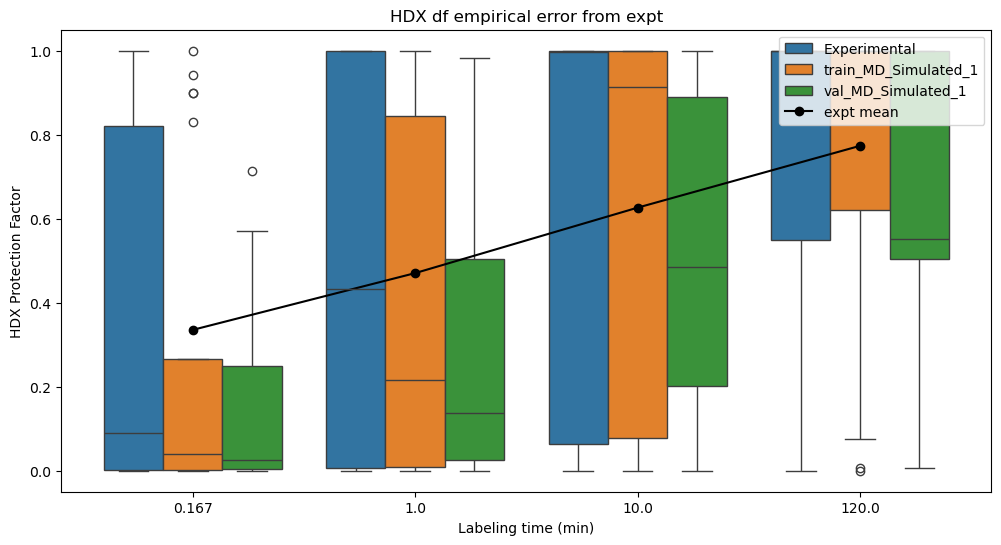

plotting paired errors
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000111  0.000663  0.006608  0.075666       36  test_MD_Simulated_1   
119  0.010440  0.059401  0.362303  0.558038       37  test_MD_Simulated_1   
120  0.025079  0.140829  0.773697  1.000000       38  test_MD_Simulated_1   
121  0.014793  0.082356  0.420637  0.547352       39  test_MD_Simulated_1   
122  0.000134  0.000802  0.007992  0.091791       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN 

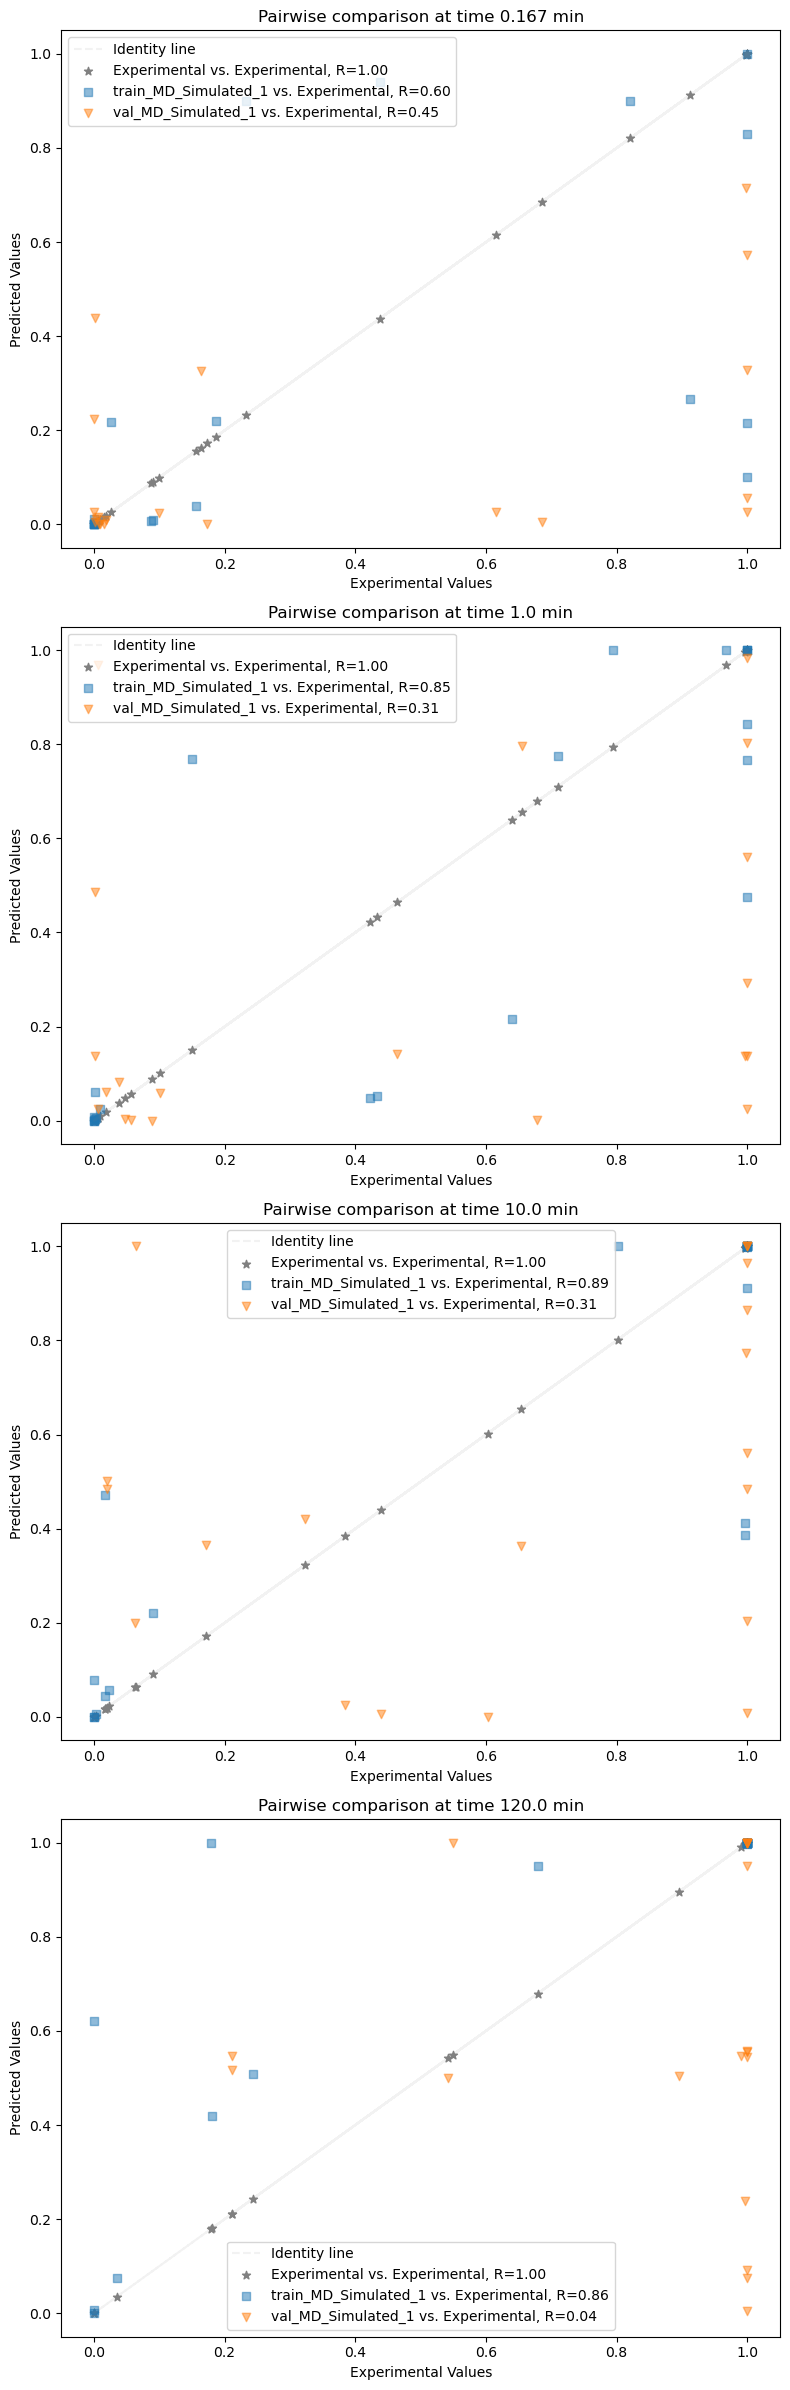

plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000111  0.000663  0.006608  0.075666       36  test_MD_Simulated_1   
119  0.010440  0.059401  0.362303  0.558038       37  test_MD_Simulated_1   
120  0.025079  0.140829  0.773697  1.000000       38  test_MD_Simulated_1   
121  0.014793  0.082356  0.420637  0.547352       39  test_MD_Simulated_1   
122  0.000134  0.000802  0.007992  0.091791       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN  

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train_R, str(key):train})], ignore_index=True)


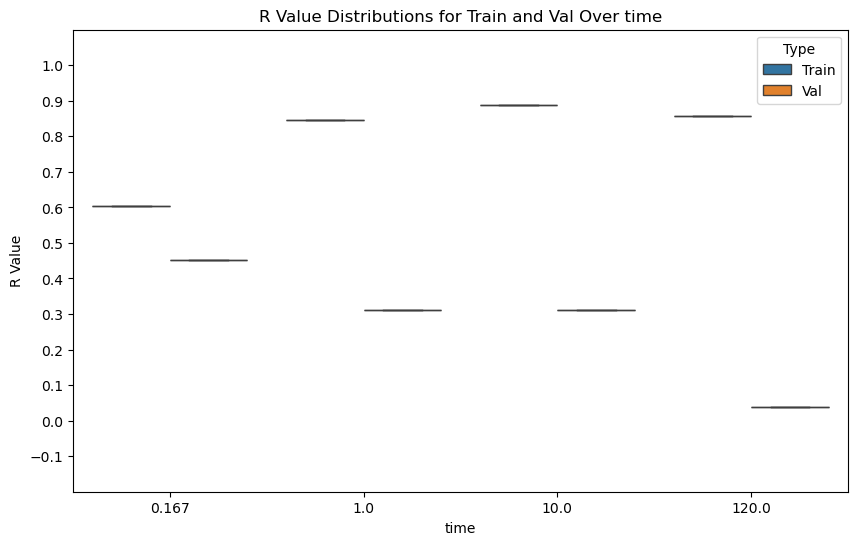

nan_df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.039880  0.216260  0.912560  1.000000        0  train_MD_Simulated_1   
1   0.008860  0.051900  0.413110  0.998330        1  train_MD_Simulated_1   
2   0.217050  0.768970  1.000000  1.000000        2  train_MD_Simulated_1   
3   0.220330  0.774700  1.000000  1.000000        3  train_MD_Simulated_1   
4   0.999800  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
..       ...       ...       ...       ...      ...                   ...   
77  0.000111  0.000663  0.006608  0.075666       36    val_MD_Simulated_1   
78  0.010440  0.059401  0.362303  0.558038       37    val_MD_Simulated_1   
79  0.025079  0.140829  0.773697  1.000000       38    val_MD_Simulated_1   
80  0.014793  0.082356  0.420637  0.547352       39    val_MD_Simulated_1   
81  0.000134  0.000802  0.007992  0.091791       40    val_MD_Simulated_1   

    ResStr  ResEnd                                               pat

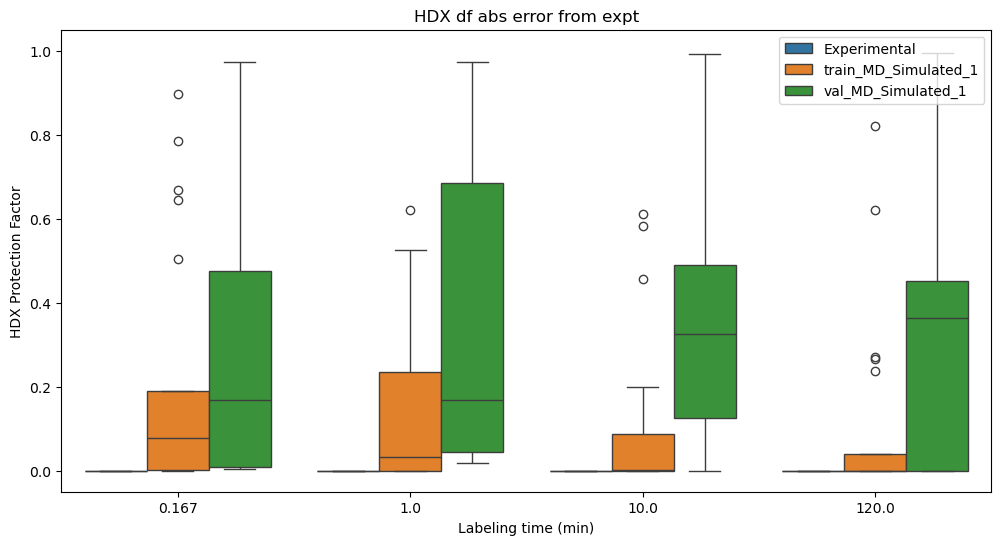

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.03988  0.21626  0.91256  1.00000        0  train_MD_Simulated_1   
1    0.00886  0.05190  0.41311  0.99833        1  train_MD_Simulated_1   
2    0.21705  0.76897  1.00000  1.00000        2  train_MD_Simulated_1   
3    0.22033  0.77470  1.00000  1.00000        3  train_MD_Simulated_1   
4    0.99980  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
118  0.00963  0.05627  0.43963  0.99904       36          Experimental   
119  0.01757  0.10068  0.65396  1.00000       37          Experimental   
120  0.09888  0.46390  0.99804  1.00000       38          Experimental   
121  0.00650  0.03831  0.32339  0.99079       39          Experimental   
122  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

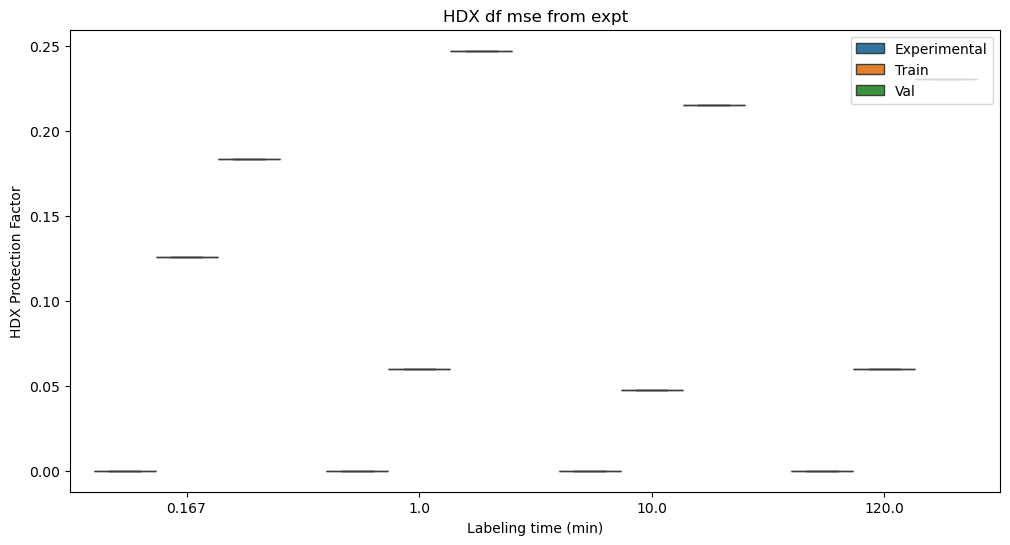

Saving experiment to:  logs/sequential_s2_1706635416.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:389: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R0
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R1
Experiment name redundancy_R already exists. Attempting to change name to redundancy_R2
Preparing HDX data for Experimental
Path /home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
AVG: ncol = 6, len(names) = 4
                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   
2                                                NaN  MD_Simulated

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy o

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008_str100000.dcd 

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis

Path /home/alexi/Documents/ValDX/data/redundancy_R2/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/redundancy_R2/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/redundancy_R2/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/redundancy_R2/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/redundancy_R2/train_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/redundancy_R2/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/redundancy_R2/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10.   , 120.   ]), 

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Structures loaded MD_Simulated: 
MD_Simulated Topology: <Universe with 892 atoms>
MD_Simulated Trajectory: <Universe with 892 atoms>
MD_Simulated Traj: no frames 413
rates: {3: 917.89750993, 4: 481.71945087, 5: 5161.71683323, 6: 961.15665221, 7: 606.44884922, 10: 391.55626544, 11: 1210.02453405, 12: 1874.10610826, 14: 2586.98658096, 15: 3332.68430264, 16: 1670.29882931, 17: 1523.33063592, 18: 391.55626418, 19: 138.92940524, 20: 897.00357941, 21: 1129.26060126, 22: 818.07698781, 23: 781.2574583, 24: 4393.33353955, 25: 2647.24524348, 26: 1155.56446029, 27: 1670.29882931, 28: 1182.48101644, 29: 492.94013356, 30: 2772.00606395, 31: 4195.60095807, 32: 1709.20508419, 33: 1155.56445915, 34: 290.26466884, 35: 492.94013192, 36: 1326.76551956, 37: 1749.01759097, 38: 6649.57939778, 39: 4393.33353926, 40: 2102.78164041, 41: 1155.56446029, 42: 2008.14087449, 43: 6498.2164901, 44: 8180.76987097, 45: 1523.3306357, 46: 1326.76551855, 47: 3915.56263922, 48: 2528.09957894, 49: 983.54486703, 50: 1129.260

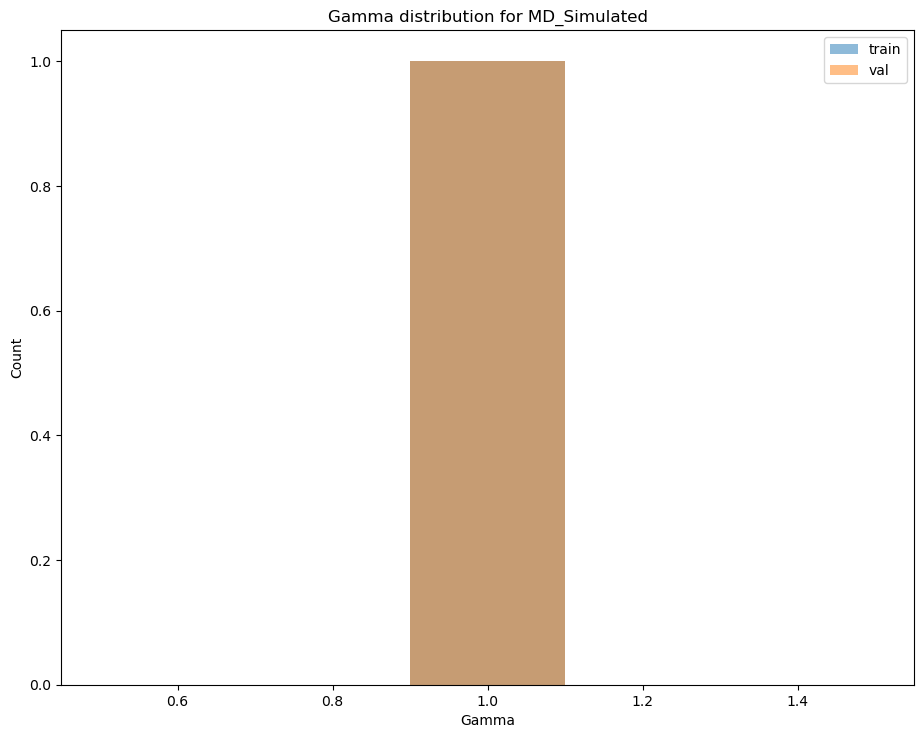

['train_MD_Simulated_1']
['val_MD_Simulated_1']
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000420  0.002509  0.024711  0.248384       36  test_MD_Simulated_1   
119  0.034956  0.176643  0.512855  0.691037       37  test_MD_Simulated_1   
120  0.080812  0.394810  0.991687  1.000000       38  test_MD_Simulated_1   
121  0.046485  0.221930  0.515829  0.672607       39  test_MD_Simulated_1   
122  0.000488  0.002917  0.028769  0.293802       40  test_MD_Simulated_1   

     Re

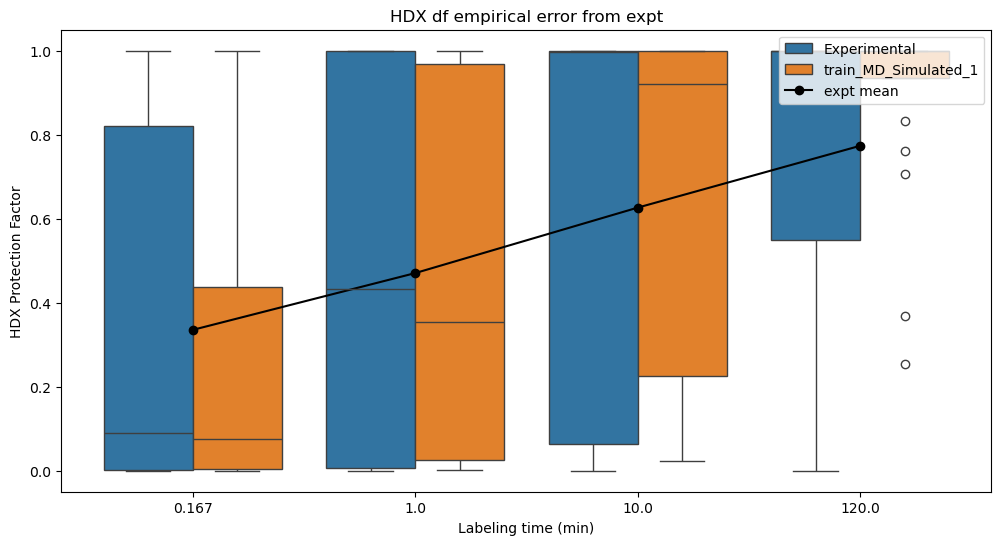

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000420  0.002509  0.024711  0.248384       36  test_MD_Simulated_1   
119  0.034956  0.176643  0.512855  0.691037       37  test_MD_Simulated_1   
120  0.080812  0.394810  0.991687  1.000000       38  test_MD_Simulated_1   
121  0.046485  0.221930  0.515829  0.672607       39  test_MD_Simulated_1   
122  0.000488  0.002917  0.028769  0.293802       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

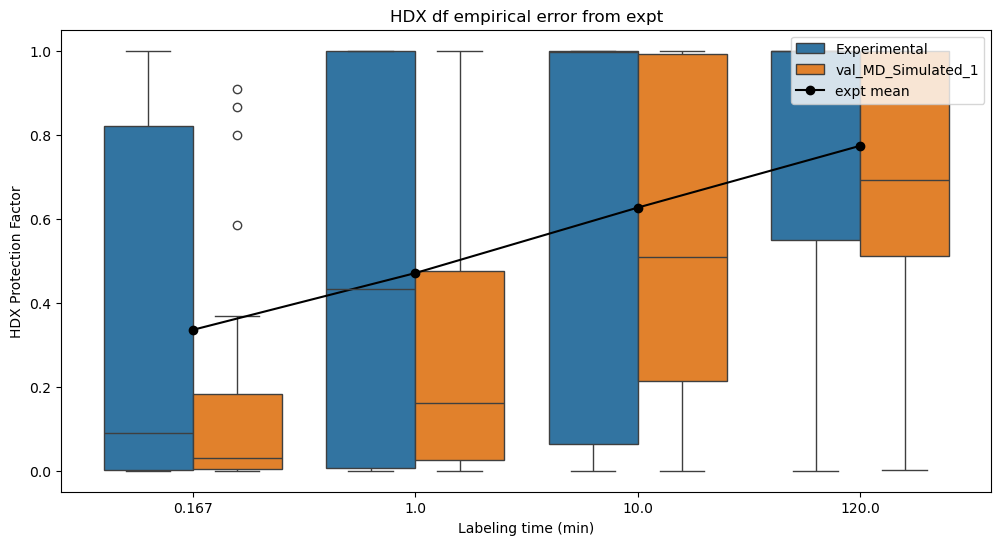

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000420  0.002509  0.024711  0.248384       36  test_MD_Simulated_1   
119  0.034956  0.176643  0.512855  0.691037       37  test_MD_Simulated_1   
120  0.080812  0.394810  0.991687  1.000000       38  test_MD_Simulated_1   
121  0.046485  0.221930  0.515829  0.672607       39  test_MD_Simulated_1   
122  0.000488  0.002917  0.028769  0.293802       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

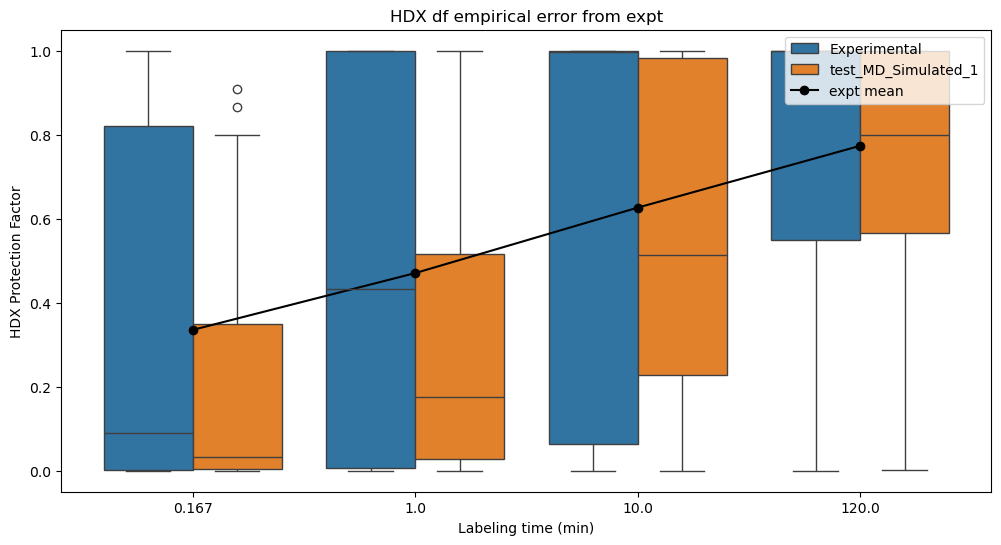

train_rep_names ['train_MD_Simulated_1']
val_rep_names ['val_MD_Simulated_1']
test_rep_names ['test_MD_Simulated_1']
train_rep_peptides [1, 2, 3, 4, 7, 9, 10, 13, 15, 17, 18, 24, 27, 30, 31, 32, 33, 35, 39, 40]
val_rep_peptides [0, 5, 6, 8, 11, 12, 14, 16, 19, 20, 21, 22, 23, 25, 26, 28, 29, 34, 36, 37, 38]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
manual merge df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.023140  0.130810  0.753890  1.000000        1  train_MD_Simulated_1   
1   0.348750  0.923310  1.000000  1.000000        2  train_MD_Simulated_1   
2   0.252100  0.824380  1.000000  1.000000        3  train_MD_Simulated_1   
3   0.999910  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
4   0.438340  0.968390  1.000000  1.000000        7  train_MD_Simulated_1   
..       ...       ...       ...       .

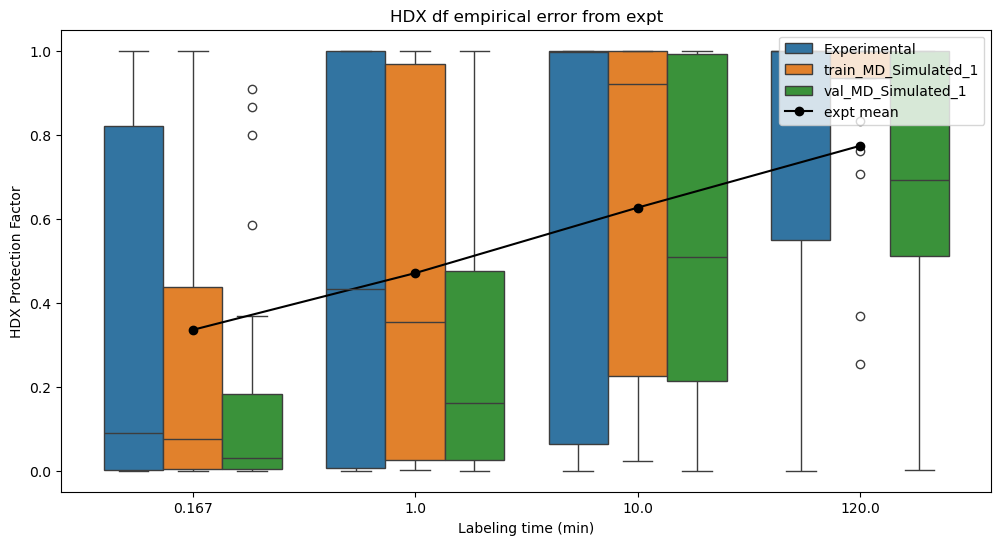

plotting paired errors
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000420  0.002509  0.024711  0.248384       36  test_MD_Simulated_1   
119  0.034956  0.176643  0.512855  0.691037       37  test_MD_Simulated_1   
120  0.080812  0.394810  0.991687  1.000000       38  test_MD_Simulated_1   
121  0.046485  0.221930  0.515829  0.672607       39  test_MD_Simulated_1   
122  0.000488  0.002917  0.028769  0.293802       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN 

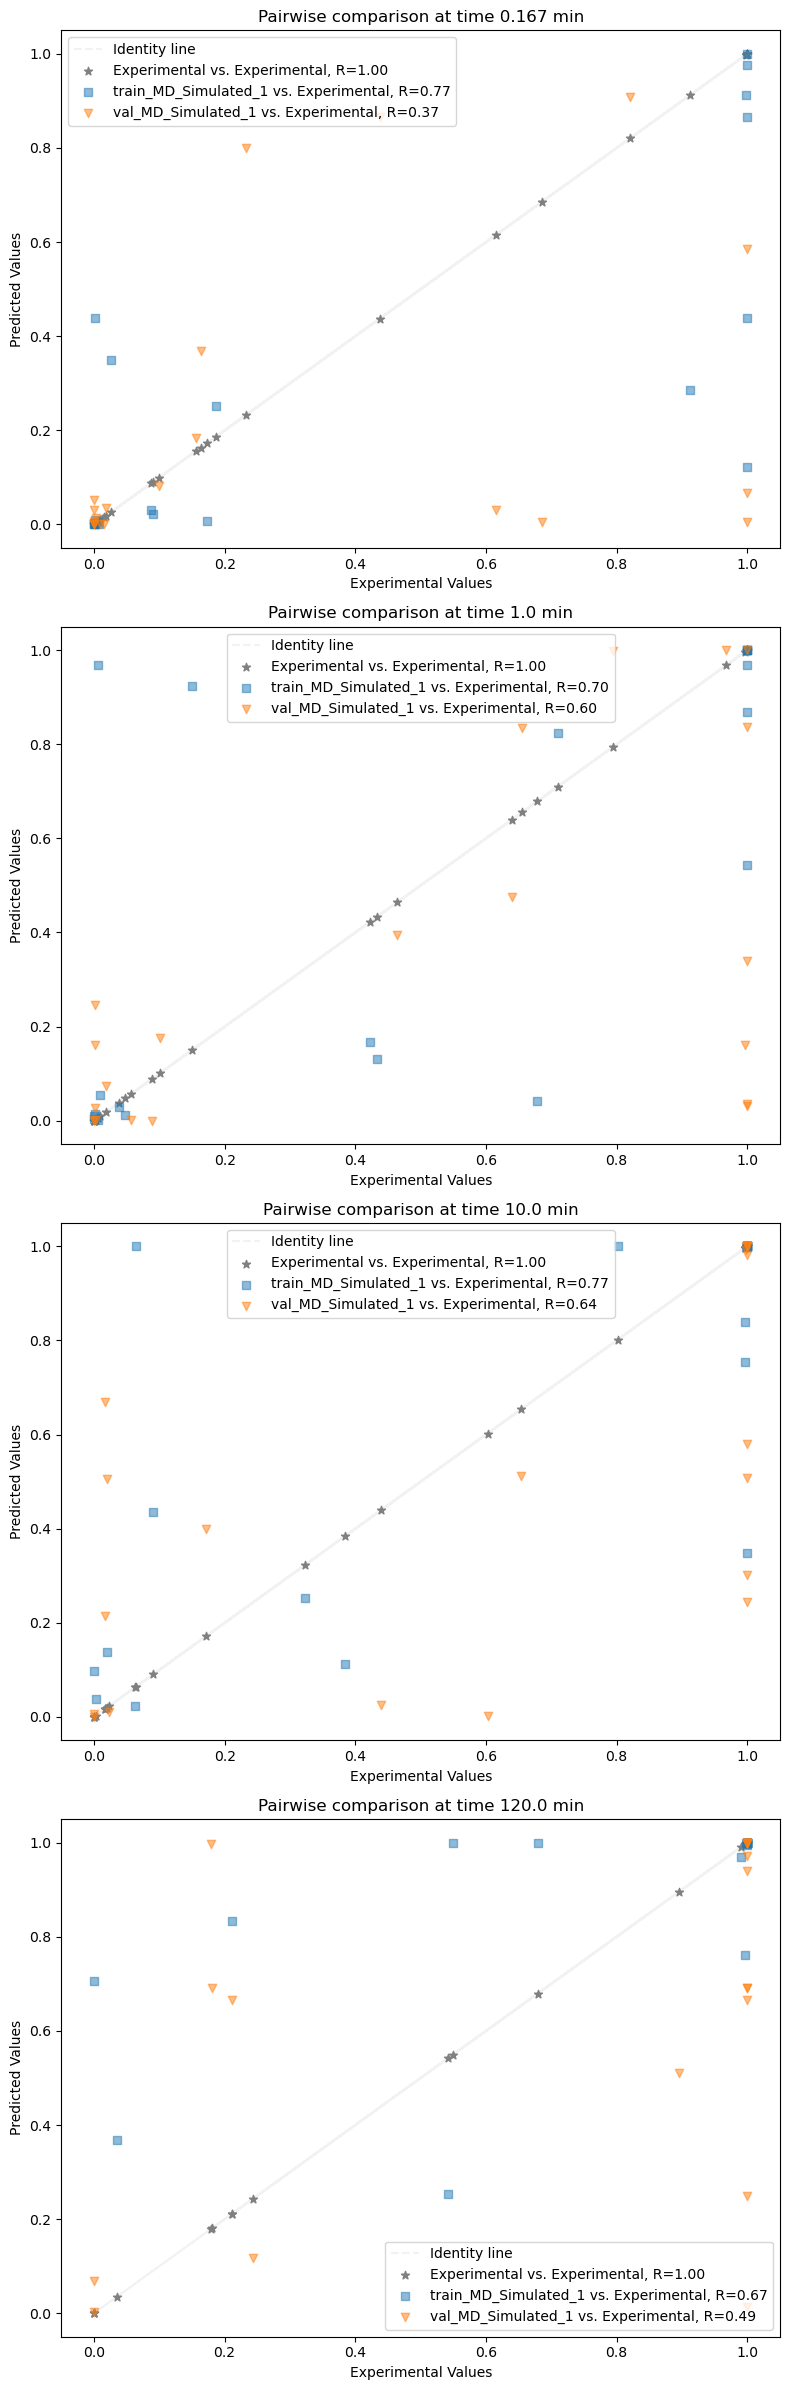

plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000420  0.002509  0.024711  0.248384       36  test_MD_Simulated_1   
119  0.034956  0.176643  0.512855  0.691037       37  test_MD_Simulated_1   
120  0.080812  0.394810  0.991687  1.000000       38  test_MD_Simulated_1   
121  0.046485  0.221930  0.515829  0.672607       39  test_MD_Simulated_1   
122  0.000488  0.002917  0.028769  0.293802       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN  

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train_R, str(key):train})], ignore_index=True)


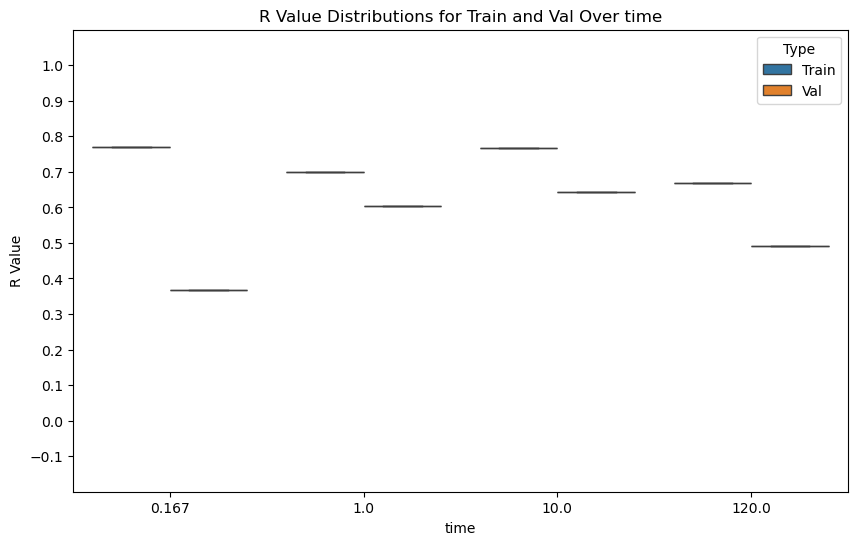

nan_df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.023140  0.130810  0.753890  1.000000        1  train_MD_Simulated_1   
1   0.348750  0.923310  1.000000  1.000000        2  train_MD_Simulated_1   
2   0.252100  0.824380  1.000000  1.000000        3  train_MD_Simulated_1   
3   0.999910  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
4   0.438340  0.968390  1.000000  1.000000        7  train_MD_Simulated_1   
..       ...       ...       ...       ...      ...                   ...   
77  0.585445  0.837258  0.999993  1.000000       29    val_MD_Simulated_1   
78  0.067001  0.338881  0.981504  1.000000       34    val_MD_Simulated_1   
79  0.000420  0.002509  0.024711  0.248384       36    val_MD_Simulated_1   
80  0.034956  0.176643  0.512855  0.691037       37    val_MD_Simulated_1   
81  0.080812  0.394810  0.991687  1.000000       38    val_MD_Simulated_1   

    ResStr  ResEnd                                               pat

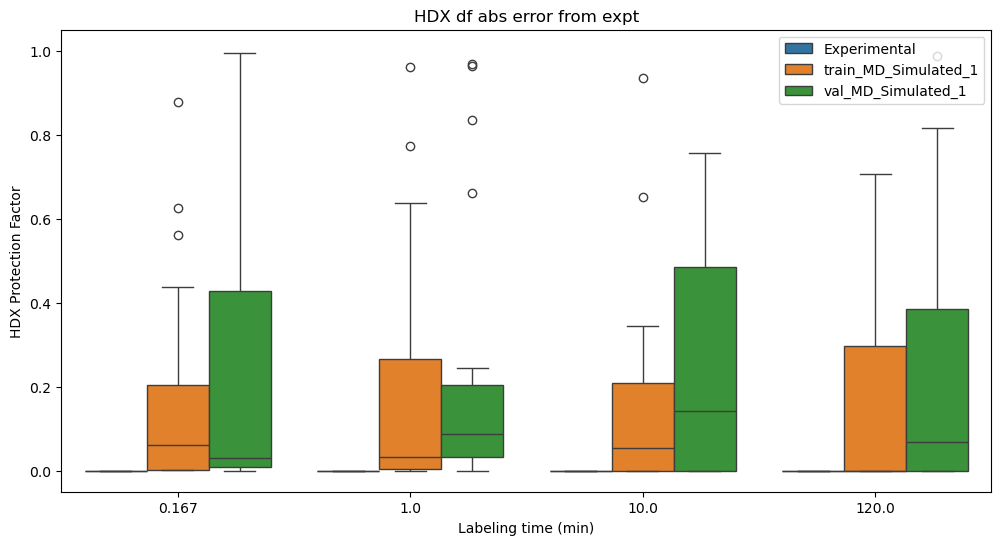

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.02314  0.13081  0.75389  1.00000        1  train_MD_Simulated_1   
1    0.34875  0.92331  1.00000  1.00000        2  train_MD_Simulated_1   
2    0.25210  0.82438  1.00000  1.00000        3  train_MD_Simulated_1   
3    0.99991  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
4    0.43834  0.96839  1.00000  1.00000        7  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
118  0.00963  0.05627  0.43963  0.99904       36          Experimental   
119  0.01757  0.10068  0.65396  1.00000       37          Experimental   
120  0.09888  0.46390  0.99804  1.00000       38          Experimental   
121  0.00650  0.03831  0.32339  0.99079       39          Experimental   
122  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

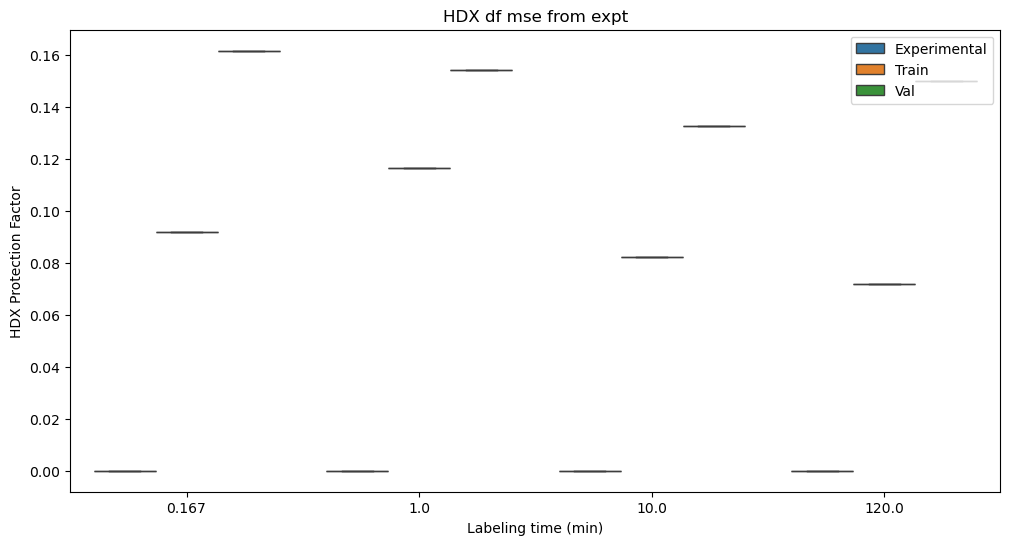

Saving experiment to:  logs/redundancy_R2_1706635527.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:389: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [7]:

hdx_path, segs_path, rates_path, top_path, small_traj_paths, reps, sim_name, expt_name, test_name = preprocess_main_MD()

splits = ['r', 's', 'R']
split_names = ['random', 'sequential', 'redundancy']
system = 'BPTIshaw_test'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps[name] = analysis_dump[name]
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)



In [8]:
print(analysis_df)

       time          Type         R             calc_name       mse  \
0     0.167         Train  0.728129  train_MD_Simulated_1       NaN   
1     0.167           Val  0.504701    val_MD_Simulated_1       NaN   
2     1.000         Train  0.818250  train_MD_Simulated_1       NaN   
3     1.000           Val  0.561945    val_MD_Simulated_1       NaN   
4    10.000         Train  0.708334  train_MD_Simulated_1       NaN   
5    10.000           Val  0.563403    val_MD_Simulated_1       NaN   
6   120.000         Train  0.566255  train_MD_Simulated_1       NaN   
7   120.000           Val  0.637039    val_MD_Simulated_1       NaN   
8     0.167  Experimental       NaN          Experimental  0.000000   
9     0.167         Train       NaN  train_MD_Simulated_1  0.105266   
10    0.167           Val       NaN    val_MD_Simulated_1  0.145001   
11    1.000  Experimental       NaN          Experimental  0.000000   
12    1.000         Train       NaN  train_MD_Simulated_1  0.075145   
13    

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


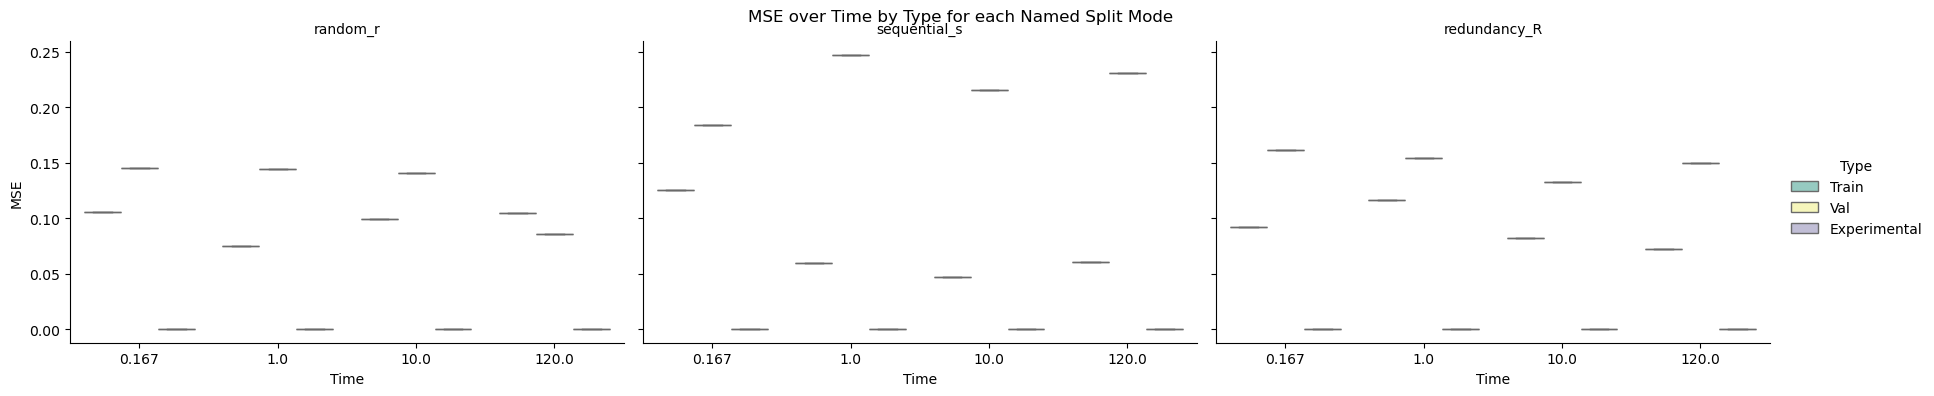

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


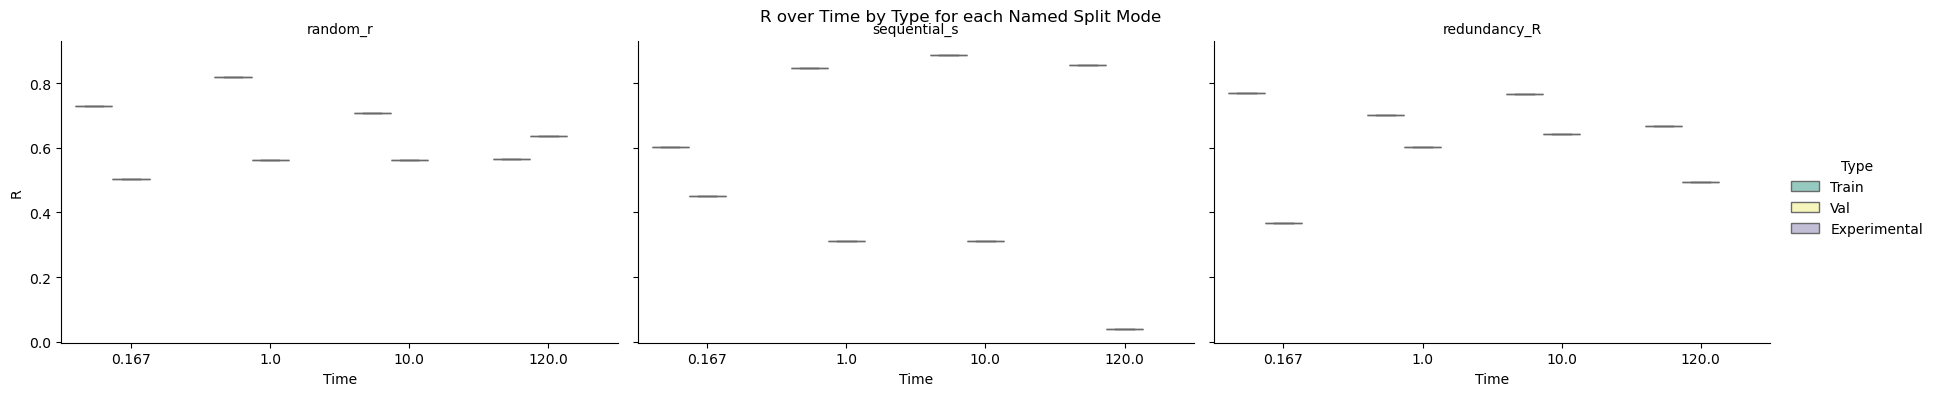

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()
